<a href="https://colab.research.google.com/github/Gurpreet654/Traffic-Flow-Analysis-and-Prediction-Using-Bicycle-Data-from-Strava-App-Enhanced-by-Machine-Learning/blob/main/gpx_to_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection and Preprocessing (Strava Integration)**:
Using the Strava app, I will gather bicycle movement data from one point to another through traffic-light-controlled intersections. Collected features will include timestamps, GPS location. Preprocessing will include data cleaning, normalization, and feature engineering, specifically adding new features to represent waiting times, time of day, and speed variance around traffic lights.

In [ ]:
pip install gpxpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt

**Step 1:**
In the initial stage of our data analysis, we acquired the raw geospatial data using the Strava app, which is widely used for tracking athletic activities such as running and cycling. The data was originally obtained in GPX (GPS Exchange Format), a format that is commonly used for sharing GPS data. To facilitate further analysis, we converted the GPX files into CSV (Comma-Separated Values) format. This conversion was necessary because CSV files are easier to manipulate and analyze using data processing tools, allowing us to effectively extract and manage the relevant latitude and longitude information for subsequent analyses.

In [ ]:
import os
import gpxpy
import csv

# Function to convert a single GPX to CSV
def gpx_to_csv(gpx_file_path, csv_file_path):
    # Open and parse the GPX file
    with open(gpx_file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    # Open the CSV file for writing
    with open(csv_file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write the header to the CSV file
        csv_writer.writerow(['latitude', 'longitude', 'elevation', 'time'])

        # Iterate through tracks, segments, and points
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    csv_writer.writerow([point.latitude, point.longitude, point.elevation, point.time])

    print(f"GPX data from {gpx_file_path} has been successfully written to {csv_file_path}")

# Function to batch convert all GPX files in a directory
def batch_convert_gpx_to_csv(gpx_folder_path, csv_folder_path):
    # Ensure the CSV folder exists
    if not os.path.exists(csv_folder_path):
        os.makedirs(csv_folder_path)

    # Loop through all files in the GPX folder
    for gpx_file_name in os.listdir(gpx_folder_path):
        if gpx_file_name.endswith('.gpx'):
            gpx_file_path = os.path.join(gpx_folder_path, gpx_file_name)
            csv_file_name = gpx_file_name.replace('.gpx', '.csv')
            csv_file_path = os.path.join(csv_folder_path, csv_file_name)

            # Convert each GPX file to CSV
            gpx_to_csv(gpx_file_path, csv_file_path)

# Specify the GPX folder and the destination folder for CSV files
gpx_folder_path = '/content/gpx'
csv_folder_path = '/content/csv'

# Batch convert all GPX files to CSV
batch_convert_gpx_to_csv(gpx_folder_path, csv_folder_path)


GPX data from /content/csv/C6 (1).gpx has been successfully written to /content/c/C6 (1).csv
GPX data from /content/csv/Cb7.gpx has been successfully written to /content/c/Cb7.csv
GPX data from /content/csv/Cb5 (1).gpx has been successfully written to /content/c/Cb5 (1).csv
GPX data from /content/csv/Morning_Ride (4).gpx has been successfully written to /content/c/Morning_Ride (4).csv
GPX data from /content/csv/Morning_Ride.gpx has been successfully written to /content/c/Morning_Ride.csv
GPX data from /content/csv/Cya16.gpx has been successfully written to /content/c/Cya16.csv
GPX data from /content/csv/Cy11.gpx has been successfully written to /content/c/Cy11.csv
GPX data from /content/csv/C6.gpx has been successfully written to /content/c/C6.csv
GPX data from /content/csv/Morning_Ride (3).gpx has been successfully written to /content/c/Morning_Ride (3).csv
GPX data from /content/csv/Cb1.gpx has been successfully written to /content/c/Cb1.csv
GPX data from /content/csv/Cya15.gpx has b

**step 2:** Before creating a final concatenated file of all rides, we assigned a unique identifier (ID) to each ride. This unique ID allows us to differentiate between the activities in our dataset, ensuring that all entries can be accurately traced back to their respective rides. After assigning unique IDs, we combined the individual CSV files into a single, comprehensive dataset, making it ready for subsequent analysis and visualization.

In [ ]:
# Function to add unique ID column (filename) to each CSV
def add_unique_id_to_csv(csv_file_path, output_file_path):
    # Extract the file name without extension to use as the unique ID
    unique_id = os.path.basename(csv_file_path).replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Preserve the original column order
    original_columns = list(df.columns)

    # Add a new column 'unique_id' with the unique ID value for all rows
    df['unique_id'] = unique_id

    # Ensure that the 'unique_id' column is added to the end of the original columns
    df = df[original_columns + ['unique_id']]

    # Save the modified DataFrame back to CSV without altering the row order
    df.to_csv(output_file_path, index=True)

    print(f"Added unique ID to {csv_file_path} and saved to {output_file_path}")

# Function to batch process multiple CSV files
def batch_add_unique_id_to_csv(csv_folder_path, output_folder_path):
    # Ensure the output folder exists
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # Loop through all CSV files in the directory
    for csv_file_name in os.listdir(csv_folder_path):
        if csv_file_name.endswith('.csv'):
            csv_file_path = os.path.join(csv_folder_path, csv_file_name)
            output_file_path = os.path.join(output_folder_path, csv_file_name)

            # Add the unique ID column to each CSV file
            add_unique_id_to_csv(csv_file_path, output_file_path)

# Specify the folder containing the CSV files and the output folder
csv_folder_path = '/content/csv'
output_folder_path = '/content/csv_indexed'

# Batch process all CSV files to add unique ID column
batch_add_unique_id_to_csv(csv_folder_path, output_folder_path)


Added unique ID to /content/c/Morning_Ride.csv and saved to /content/c2/Morning_Ride.csv
Added unique ID to /content/c/Morning_Ride (1).csv and saved to /content/c2/Morning_Ride (1).csv
Added unique ID to /content/c/C7.csv and saved to /content/c2/C7.csv
Added unique ID to /content/c/Cb6.csv and saved to /content/c2/Cb6.csv
Added unique ID to /content/c/Cb7.csv and saved to /content/c2/Cb7.csv
Added unique ID to /content/c/Afternoon_Ride (2).csv and saved to /content/c2/Afternoon_Ride (2).csv
Added unique ID to /content/c/C5.csv and saved to /content/c2/C5.csv
Added unique ID to /content/c/C6 (1).csv and saved to /content/c2/C6 (1).csv
Added unique ID to /content/c/Afternoon_Ride (3).csv and saved to /content/c2/Afternoon_Ride (3).csv
Added unique ID to /content/c/Cy13.csv and saved to /content/c2/Cy13.csv
Added unique ID to /content/c/Morning_Ride (5).csv and saved to /content/c2/Morning_Ride (5).csv
Added unique ID to /content/c/Cya15.csv and saved to /content/c2/Cya15.csv
Added uniq

In [ ]:
a=pd.read_csv('/content/csv/Morning_Ride (4).csv')

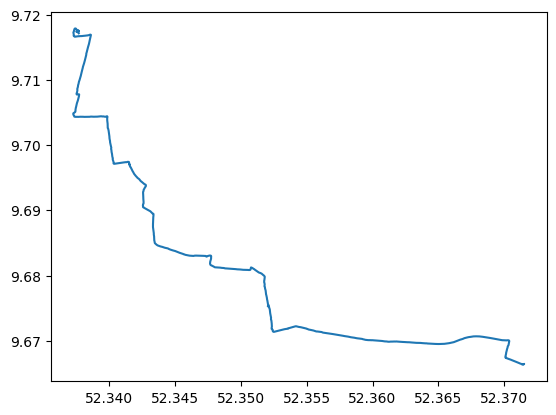

In [ ]:
plt.plot(a['latitude'],a['longitude'])

In [ ]:
a

,latitude,longitude,elevation,time
0,52.371377,9.666387,71.5,2024-09-06 04:26:27+00:00
1,52.371377,9.666387,71.5,2024-09-06 04:26:28+00:00
2,52.371446,9.666384,71.4,2024-09-06 04:26:29+00:00
3,52.371466,9.666392,71.3,2024-09-06 04:26:30+00:00
4,52.371482,9.666415,71.3,2024-09-06 04:26:31+00:00
...,...,...,...,...
1519,52.337620,9.717402,57.0,2024-09-06 04:54:29+00:00
1520,52.337623,9.717399,57.0,2024-09-06 04:54:30+00:00
1521,52.337624,9.717399,57.0,2024-09-06 04:54:31+00:00
1522,52.337623,9.717398,57.0,2024-09-06 04:54:32+00:00


**Step 3:** Final combined file of all days. The combined dataset includes essential columns such as latitude, longitude, and the unique ID assigned to each ride, facilitating efficient analysis and visualization. By merging the data into a single file, we streamline the data processing workflow, enabling us to conduct various analyses, such as evaluating the impact of traffic on ride routes or identifying patterns in geographic locations. This unified approach enhances the overall integrity of the data and simplifies subsequent analytical tasks.

In [ ]:
import pandas as pd
import os

# Specify the folder containing your CSV files
folder_path = '/content/cc1'  # Replace with your folder path
output_file = 'csv_combined.csv'     # Name of the output file

# Create an empty list to hold the DataFrames
dataframes = []

# Loop through all files in the specified folder, in sorted order to preserve naming order
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read each CSV file and append to the list
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f'All CSV files have been combined into {output_file} file')


All CSV files have been combined into csv_combined.csv file


**Visualization and Validation of the Final Combined File:**
After generating the final combined file from all individual rides, it is essential to perform thorough validation and visualizations to ensure data integrity and gain insights. This process typically involves the following steps:

In [ ]:
a1=pd.read_csv('/content/csv_combined.csv')

In [ ]:
a1['unique_id'].unique()

array(['Afternoon_Ride (1)', 'Afternoon_Ride (2)', 'Afternoon_Ride (3)',
       'Afternoon_Ride', 'C2', 'C3', 'C4', 'C5', 'C6 (1)', 'C6', 'C7',
       'C8', 'C9', 'Cb1', 'Cb2', 'Cb5 (1)', 'Cb5 (2)', 'Cb6', 'Cb7',
       'Cb8', 'Cb9', 'Cy10', 'Cy11', 'Cy11a', 'Cy12', 'Cy13 (1)', 'Cy13',
       'Cya12', 'Cya15', 'Cya16', 'Cya17', 'Cya18', 'Cyc14', 'H1',
       'Lunch_Ride', 'Morning_Ride (1)', 'Morning_Ride (2)',
       'Morning_Ride (3)', 'Morning_Ride (4)', 'Morning_Ride (5)',
       'Morning_Ride'], dtype=object)

In [ ]:
a11=a1[a1['unique_id']=='Morning_Ride (1)']

In [ ]:
a11

,latitude,longitude,elevation,time,index,unique_id
56964,52.371001,9.666911,70.0,2024-09-16 04:26:22+00:00,1,Morning_Ride (1)
56965,52.370978,9.666875,69.9,2024-09-16 04:26:23+00:00,2,Morning_Ride (1)
56966,52.370955,9.666838,69.8,2024-09-16 04:26:24+00:00,3,Morning_Ride (1)
56967,52.370932,9.666802,69.7,2024-09-16 04:26:25+00:00,4,Morning_Ride (1)
56968,52.370897,9.666832,69.5,2024-09-16 04:26:26+00:00,5,Morning_Ride (1)
...,...,...,...,...,...,...
58380,52.337823,9.716804,58.8,2024-09-16 04:59:36+00:00,1417,Morning_Ride (1)
58381,52.337823,9.716804,58.8,2024-09-16 04:59:37+00:00,1418,Morning_Ride (1)
58382,52.337823,9.716804,58.8,2024-09-16 04:59:38+00:00,1419,Morning_Ride (1)
58383,52.337823,9.716804,58.8,2024-09-16 04:59:39+00:00,1420,Morning_Ride (1)


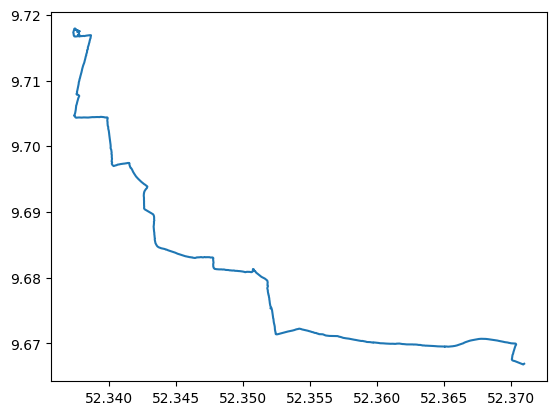

In [ ]:
plt.plot(a11['latitude'],a11['longitude'])